In [6]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
#!pip install beautifulsoup4
from bs4 import BeautifulSoup # library for web scrapping  

#!conda install -c conda-forge geocoder --yes
import geocoder

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
#!pip3 install lxml
import lxml

print('Folium installed')
print('Libraries imported.')


Folium installed
Libraries imported.


In [7]:
CLIENT_ID = 'FTNGNMXVLREFP5DIH5UUSMZTIJP0UYX4FRSMCIXDNY3CB31P' # your Foursquare ID
CLIENT_SECRET = 'T10PJWK42XUUSD55EDABYHD1I4CCOP5FAAHX1G4R4BX0RFE1' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FTNGNMXVLREFP5DIH5UUSMZTIJP0UYX4FRSMCIXDNY3CB31P
CLIENT_SECRET:T10PJWK42XUUSD55EDABYHD1I4CCOP5FAAHX1G4R4BX0RFE1


In [8]:
df = pd.read_csv("loncrime.csv")
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11.0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11.0
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5.0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3.0
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6.0
...,...,...,...,...,...,...,...
45486,E01002469,Hillingdon,Violence Against the Person,Assault with Injury,1,2010,5.0
45487,E01002575,Hounslow,Theft and Handling,Theft From Shops,0,2008,7.0
45488,E01002645,Hounslow,Robbery,Business Property,0,2012,9.0
45489,E01003797,Richmond upon Thames,Criminal Damage,Criminal Damage To Other Building,0,2011,5.0


In [9]:
df.drop(df.index[df['year'] != 2016], inplace = True)  
df = df[df.value != 0]
df = df.reset_index(drop=True)
df.shape

(1346, 7)

In [10]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8.0
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4.0
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8.0
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8.0
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11.0
...,...,...,...,...,...,...,...
1341,E01002053,Haringey,Violence Against the Person,Harassment,3,2016,3.0
1342,E01000718,Bromley,Violence Against the Person,Assault with Injury,2,2016,5.0
1343,E01002960,Kingston upon Thames,Burglary,Burglary in a Dwelling,1,2016,12.0
1344,E01000305,Barnet,Drugs,Possession Of Drugs,2,2016,11.0


In [11]:
df.columns = ['LSOA_Code', 'Borough','MajorCrime','MinorCrime','No_of_Crimes','Year','Month']
df.head()

,LSOA_Code,Borough,MajorCrime,MinorCrime,No_of_Crimes,Year,Month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8.0
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4.0
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8.0
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8.0
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LSOA_Code     1346 non-null   object 
 1   Borough       1346 non-null   object 
 2   MajorCrime    1346 non-null   object 
 3   MinorCrime    1346 non-null   object 
 4   No_of_Crimes  1346 non-null   int64  
 5   Year          1346 non-null   int64  
 6   Month         1346 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 73.7+ KB


In [13]:
df['Borough'].value_counts()

Southwark                 72
Newham                    59
Brent                     55
Lambeth                   53
Haringey                  51
Camden                    50
Westminster               50
Hackney                   49
Hillingdon                48
Barnet                    48
Islington                 47
Lewisham                  47
Redbridge                 47
Enfield                   47
Croydon                   47
Wandsworth                46
Tower Hamlets             46
Hounslow                  44
Waltham Forest            43
Kensington and Chelsea    42
Greenwich                 40
Bromley                   40
Ealing                    39
Havering                  36
Hammersmith and Fulham    33
Merton                    32
Richmond upon Thames      29
Barking and Dagenham      28
Harrow                    25
Sutton                    25
Bexley                    20
Kingston upon Thames       8
Name: Borough, dtype: int64

In [14]:
df['MajorCrime'].value_counts()

Theft and Handling             452
Violence Against the Person    404
Criminal Damage                169
Burglary                       149
Drugs                           84
Robbery                         49
Other Notifiable Offences       39
Name: MajorCrime, dtype: int64

In [15]:
London_crime = pd.pivot_table(df,values=['No_of_Crimes'],
                               index=['Borough'],
                               columns=['MajorCrime'],
                               aggfunc=np.sum,fill_value=0)
London_crime.head()

No_of_Crimes                        \
MajorCrime               Burglary Criminal Damage Drugs   
Borough                                                   
Barking and Dagenham            2               2     2   
Barnet                          9              10     4   
Bexley                          3               3     3   
Brent                          17               7     4   
Bromley                         7               6     4   

                                                                           \
MajorCrime           Other Notifiable Offences Robbery Theft and Handling   
Borough                                                                     
Barking and Dagenham                         4       4                 33   
Barnet                                       3       0                 28   
Bexley                                       2       0                 10   
Brent                                        1       4                 32   
Bromley                                      2       0                 30   

                                                  
MajorCrime           Violence Against the Person  
Borough                                           
Barking and Dagenham                          11  
Barnet                                        14  
Bexley                                         6  
Brent                                         24  
Bromley                                       22

In [16]:
London_crime.reset_index(inplace = True)
London_crime

Borough No_of_Crimes                        \
MajorCrime                             Burglary Criminal Damage Drugs   
0             Barking and Dagenham            2               2     2   
1                           Barnet            9              10     4   
2                           Bexley            3               3     3   
3                            Brent           17               7     4   
4                          Bromley            7               6     4   
5                           Camden            4              12     3   
6                          Croydon            6              18     2   
7                           Ealing           11              10     0   
8                          Enfield           16               7     2   
9                        Greenwich           14               6     8   
10                         Hackney            4               4    10   
11          Hammersmith and Fulham            0               4     7   
12                        Haringey            2              16     4   
13                          Harrow            3               2     1   
14                        Havering            8               6     1   
15                      Hillingdon            8               7     4   
16                        Hounslow            4               8     8   
17                       Islington           10               3    17   
18          Kensington and Chelsea            8               3     9   
19            Kingston upon Thames            2               1     0   
20                         Lambeth           10               6     2   
21                        Lewisham            4              12     8   
22                          Merton            9               4     1   
23                          Newham            3               5    13   
24                       Redbridge            1               2     4   
25            Richmond upon Thames            9               7     0   
26                       Southwark           20              14    15   
27                          Sutton            4               4     0   
28                   Tower Hamlets           17               8     1   
29                  Waltham Forest            7               4     7   
30                      Wandsworth            9              10     1   
31                     Westminster           13              12    31   

                                                                 \
MajorCrime Other Notifiable Offences Robbery Theft and Handling   
0                                  4       4                 33   
1                                  3       0                 28   
2                                  2       0                 10   
3                                  1       4                 32   
4                                  2       0                 30   
5                                  0       0                 45   
6                                  0       4                 46   
7                                  0       2                 34   
8                                  2       6                 22   
9                                  2       2                 30   
10                                 0       2                 32   
11                                 1       0                 24   
12                                 4       7                 27   
13                                 2       0                 18   
14                                 1       1                 11   
15                                 1       1                 26   
16                                 0       1                 24   
17                                 2       4                 64   
18                                 0       2                 64   
19                                 0       0                  1   
20                                 4       7                 19   
21 

In [17]:
London_crime['Total'] = London_crime.sum(axis=1)
London_crime.head(33)

Borough No_of_Crimes                        \
MajorCrime                             Burglary Criminal Damage Drugs   
0             Barking and Dagenham            2               2     2   
1                           Barnet            9              10     4   
2                           Bexley            3               3     3   
3                            Brent           17               7     4   
4                          Bromley            7               6     4   
5                           Camden            4              12     3   
6                          Croydon            6              18     2   
7                           Ealing           11              10     0   
8                          Enfield           16               7     2   
9                        Greenwich           14               6     8   
10                         Hackney            4               4    10   
11          Hammersmith and Fulham            0               4     7   
12                        Haringey            2              16     4   
13                          Harrow            3               2     1   
14                        Havering            8               6     1   
15                      Hillingdon            8               7     4   
16                        Hounslow            4               8     8   
17                       Islington           10               3    17   
18          Kensington and Chelsea            8               3     9   
19            Kingston upon Thames            2               1     0   
20                         Lambeth           10               6     2   
21                        Lewisham            4              12     8   
22                          Merton            9               4     1   
23                          Newham            3               5    13   
24                       Redbridge            1               2     4   
25            Richmond upon Thames            9               7     0   
26                       Southwark           20              14    15   
27                          Sutton            4               4     0   
28                   Tower Hamlets           17               8     1   
29                  Waltham Forest            7               4     7   
30                      Wandsworth            9              10     1   
31                     Westminster           13              12    31   

                                                                 \
MajorCrime Other Notifiable Offences Robbery Theft and Handling   
0                                  4       4                 33   
1                                  3       0                 28   
2                                  2       0                 10   
3                                  1       4                 32   
4                                  2       0                 30   
5                                  0       0                 45   
6                                  0       4                 46   
7                                  0       2                 34   
8                                  2       6                 22   
9                                  2       2                 30   
10                                 0       2                 32   
11                                 1       0                 24   
12                                 4       7                 27   
13                                 2       0                 18   
14                                 1       1                 11   
15                                 1       1                 26   
16                                 0       1                 24   
17                                 2       4                 64   
18                                 0       2                 64   
19                                 0       0                  1   
20                                 4       7                 19   
21 

In [18]:
London_crime.columns = London_crime.columns.map(''.join)
London_crime.head()

,Borough,No_of_CrimesBurglary,No_of_CrimesCriminal Damage,No_of_CrimesDrugs,No_of_CrimesOther Notifiable Offences,No_of_CrimesRobbery,No_of_CrimesTheft and Handling,No_of_CrimesViolence Against the Person,Total
0,Barking and Dagenham,2,2,2,4,4,33,11,58
1,Barnet,9,10,4,3,0,28,14,68
2,Bexley,3,3,3,2,0,10,6,27
3,Brent,17,7,4,1,4,32,24,89
4,Bromley,7,6,4,2,0,30,22,71


In [19]:
London_crime.columns = ['Borough','Burglary', 'Criminal_Damage','Drugs','Other_Notifiable_Offences',
                        'Robbery','Theft_and_Handling','Violence_Against_the_Person','Total']
London_crime.head()

,Borough,Burglary,Criminal_Damage,Drugs,Other_Notifiable_Offences,Robbery,Theft_and_Handling,Violence_Against_the_Person,Total
0,Barking and Dagenham,2,2,2,4,4,33,11,58
1,Barnet,9,10,4,3,0,28,14,68
2,Bexley,3,3,3,2,0,10,6,27
3,Brent,17,7,4,1,4,32,24,89
4,Bromley,7,6,4,2,0,30,22,71


In [20]:
London_crime.shape

(32, 9)

In [21]:
link='https://en.wikipedia.org/wiki/List_of_London_boroughs'
wikipage= requests.get(link).text

# using beautiful soup to parse the HTML/XML codes.
soup = BeautifulSoup(wikipage,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of London boroughs - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XqeLZQpAAD8AAGis4xMAAAAV","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":953518321,"wgRevisionId":953518321,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates","Geographic coordinate lists","Article

In [22]:
table = soup.find_all('table', {'class':'wikitable sortable'})


In [103]:
#headers=soup.find_all('th')
#for i, head in enumerate(headers): headers[i]=str(headers[i]).replace("<th>","").replace("</th>","").replace("\n","").replace(" ","")
#headers

In [41]:
London_table = pd.read_html(str(table[0]), index_col=None, header=0)[0]
London_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [42]:

# Read in the second table 
London_table1 = pd.read_html(str(table[1]), index_col=None, header=0)[0]

# Rename the columns to match the previous table to append the tables.

London_table1.columns = ['Borough','Inner','Status','Local authority','Political control',
                         'Headquarters','Area (sq mi)','Population (2013 est)[1]','Co-ordinates','Nr. in map']

# View the table
London_table1

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


In [43]:
London_table = London_table.append(London_table1, ignore_index = True) 
London_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [44]:
London_table.tail()


,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
28,Tower Hamlets,NaN,NaN,Tower Hamlets London Borough Council,Labour,"Town Hall, Mulberry Place, 5 Clove Crescent",7.63,272890,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,8
29,Waltham Forest,NaN,NaN,Waltham Forest London Borough Council,Labour,"Waltham Forest Town Hall, Forest Road",14.99,265797,51°35′27″N 0°00′48″W﻿ / ﻿51.5908°N 0.0134°W,28
30,Wandsworth,NaN,NaN,Wandsworth London Borough Council,Conservative,"The Town Hall, Wandsworth High Street",13.23,310516,51°27′24″N 0°11′28″W﻿ / ﻿51.4567°N 0.1910°W,5
31,Westminster,NaN,City,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,2
32,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


In [45]:
London_table.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Borough                   33 non-null     object 
 1   Inner                     4 non-null      object 
 2   Status                    5 non-null      object 
 3   Local authority           33 non-null     object 
 4   Political control         33 non-null     object 
 5   Headquarters              33 non-null     object 
 6   Area (sq mi)              33 non-null     float64
 7   Population (2013 est)[1]  33 non-null     int64  
 8   Co-ordinates              33 non-null     object 
 9   Nr. in map                33 non-null     int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ KB


In [46]:

London_table = London_table.replace('note 1','', regex=True) 
London_table = London_table.replace('note 2','', regex=True) 
London_table = London_table.replace('note 3','', regex=True) 
London_table = London_table.replace('note 4','', regex=True) 
London_table = London_table.replace('note 5','', regex=True) 

# View the top of the data set
London_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [47]:
type(London_table)

pandas.core.frame.DataFrame

In [48]:
London_table.shape

(33, 10)

In [49]:
set(df.Borough) - set(London_table.Borough)

{'Barking and Dagenham', 'Greenwich', 'Hammersmith and Fulham'}

In [50]:
print("The index of first borough is",London_table.index[London_table['Borough'] == 'Barking and Dagenham []'].tolist())
print("The index of second borough is",London_table.index[London_table['Borough'] == 'Greenwich []'].tolist())
print("The index of third borough is",London_table.index[London_table['Borough'] == 'Hammersmith and Fulham []'].tolist())

The index of first borough is [0]
The index of second borough is [9]
The index of third borough is [11]


In [51]:
London_table.iloc[0,0] = 'Barking and Dagenham'
London_table.iloc[9,0] = 'Greenwich'
London_table.iloc[11,0] = 'Hammersmith and Fulham'

In [52]:
set(df.Borough) - set(London_table.Borough)

set()

In [74]:
Ld_crime = pd.merge(London_crime, London_table, on='Borough')
Ld_crime.head(10)

,Borough,Burglary,Criminal_Damage,Drugs,Other_Notifiable_Offences,Robbery,Theft_and_Handling,Violence_Against_the_Person,Total,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,2,2,2,4,4,33,11,58,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,9,10,4,3,0,28,14,68,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,3,3,3,2,0,10,6,27,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,17,7,4,1,4,32,24,89,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,7,6,4,2,0,30,22,71,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,4,12,3,0,0,45,25,89,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,6,18,2,0,4,46,35,111,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,11,10,0,0,2,34,14,71,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,16,7,2,2,6,22,19,74,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich,14,6,8,2,2,30,13,75,[],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


In [75]:
Ld_crime.shape

(32, 18)

In [76]:
list(Ld_crime)

['Borough',
 'Burglary',
 'Criminal_Damage',
 'Drugs',
 'Other_Notifiable_Offences',
 'Robbery',
 'Theft_and_Handling',
 'Violence_Against_the_Person',
 'Total',
 'Inner',
 'Status',
 'Local authority',
 'Political control',
 'Headquarters',
 'Area (sq mi)',
 'Population (2013 est)[1]',
 'Co-ordinates',
 'Nr. in map']

In [77]:
columnsTitles = ['Borough','Local authority','Political control','Headquarters',
                 'Area (sq mi)','Population (2013 est)[1]',
                 'Inner','Status',
                 'Burglary','Criminal_Damage','Drugs','Other_Notifiable_Offences',
                 'Robbery','Theft_and_Handling','Violence_Against_the_Person','Total','Co-ordinates']

Ld_crime = Ld_crime.reindex(columns=columnsTitles)

Ld_crime = Ld_crime[['Borough','Local authority','Political control','Headquarters',
                 'Area (sq mi)','Population (2013 est)[1]','Co-ordinates',
                 'Burglary','Criminal_Damage','Drugs','Other_Notifiable_Offences',
                 'Robbery','Theft_and_Handling','Violence_Against_the_Person','Total']]

Ld_crime

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal_Damage,Drugs,Other_Notifiable_Offences,Robbery,Theft_and_Handling,Violence_Against_the_Person,Total
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,2,2,2,4,4,33,11,58
1,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,9,10,4,3,0,28,14,68
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,3,3,3,2,0,10,6,27
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,17,7,4,1,4,32,24,89
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,7,6,4,2,0,30,22,71
5,Camden,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,4,12,3,0,0,45,25,89
6,Croydon,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,6,18,2,0,4,46,35,111
7,Ealing,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,11,10,0,0,2,34,14,71
8,Enfield,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,16,7,2,2,6,22,19,74
9,Greenwich,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,14,6,8,2,2,30,13,75


In [78]:
London_crime.describe()


,Burglary,Criminal_Damage,Drugs,Other_Notifiable_Offences,Robbery,Theft_and_Handling,Violence_Against_the_Person,Total
count,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,7.62500,6.968750,5.500000,1.562500,2.187500,32.843750,23.250000,79.937500
std,5.17282,4.276601,6.430773,1.625155,2.161802,18.416524,11.511565,32.112642
min,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,6.000000,13.000000
25%,3.75000,4.000000,1.000000,0.000000,0.000000,19.000000,14.000000,62.500000
50%,7.50000,6.000000,4.000000,1.000000,2.000000,30.000000,20.500000,76.000000
75%,10.00000,10.000000,8.000000,2.000000,4.000000,42.500000,32.500000,99.250000
max,20.00000,18.000000,31.000000,5.000000,7.000000,82.000000,45.000000,147.000000


In [79]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.1.1


In [80]:
Ld_crime.columns = list(map(str, Ld_crime.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in Ld_crime.columns)

True

In [81]:
Ld_crime.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

df_top5 = Ld_crime.head() 
df_top5

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal_Damage,Drugs,Other_Notifiable_Offences,Robbery,Theft_and_Handling,Violence_Against_the_Person,Total
31,Westminster,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,13,12,31,2,2,42,45,147
23,Newham,Newham London Borough Council,Labour,"Newham Dockside, 1000 Dockside Road",13.98,318227,51°30′28″N 0°02′49″E﻿ / ﻿51.5077°N 0.0469°E,3,5,13,4,3,82,34,144
26,Southwark,Southwark London Borough Council,Labour,160 Tooley Street,11.14,298464,51°30′13″N 0°04′49″W﻿ / ﻿51.5035°N 0.0804°W,20,14,15,5,1,44,40,139
30,Wandsworth,Wandsworth London Borough Council,Conservative,"The Town Hall, Wandsworth High Street",13.23,310516,51°27′24″N 0°11′28″W﻿ / ﻿51.4567°N 0.1910°W,9,10,1,0,0,74,23,117
17,Islington,Islington London Borough Council,Labour,"Customer Centre, 222 Upper Street",5.74,215667,51°32′30″N 0°06′08″W﻿ / ﻿51.5416°N 0.1022°W,10,3,17,2,4,64,13,113


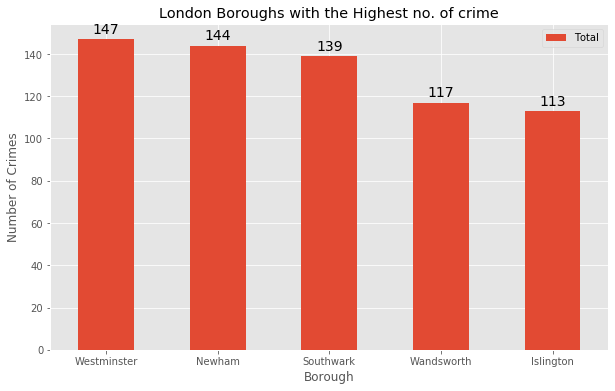

In [82]:
df_tt = df_top5[['Borough','Total']]

df_tt.set_index('Borough',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the Highest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [83]:
Ld_crime.sort_values(['Total'], ascending = True, axis = 0, inplace = True )

df_bot5 = Ld_crime.head() 
df_bot5

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal_Damage,Drugs,Other_Notifiable_Offences,Robbery,Theft_and_Handling,Violence_Against_the_Person,Total
19,Kingston upon Thames,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,2,1,0,0,0,1,9,13
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,3,3,3,2,0,10,6,27
13,Harrow,Harrow London Borough Council,Labour,"Civic Centre, Station Road",19.49,243372,51°35′23″N 0°20′05″W﻿ / ﻿51.5898°N 0.3346°W,3,2,1,2,0,18,15,41
25,Richmond upon Thames,Richmond upon Thames London Borough Council,Liberal Democrat,"Civic Centre, 44 York Street",22.17,191365,51°26′52″N 0°19′34″W﻿ / ﻿51.4479°N 0.3260°W,9,7,0,0,0,18,9,43
14,Havering,Havering London Borough Council,Conservative (council NOC),"Town Hall, Main Road",43.35,242080,51°34′52″N 0°11′01″E﻿ / ﻿51.5812°N 0.1837°E,8,6,1,1,1,11,16,44


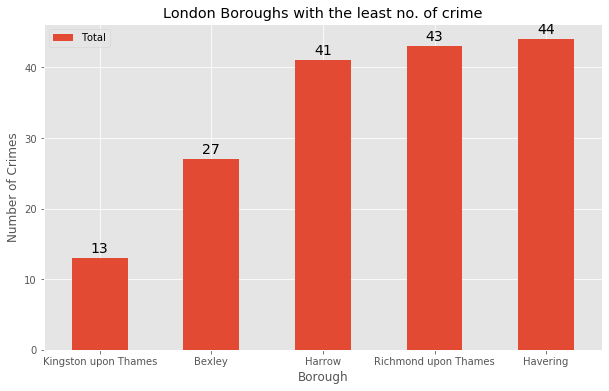

In [84]:
df_bt = df_bot5[['Borough','Total']]

df_bt.set_index('Borough',inplace = True)

ax = df_bt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [86]:
df_col = df_bot5[df_bot5['Borough'] == 'Kingston upon Thames']
df_col = df_col[['Borough','Total','Area (sq mi)','Population (2013 est)[1]']]
df_col

,Borough,Total,Area (sq mi),Population (2013 est)[1]
19,Kingston upon Thames,13,14.38,166793


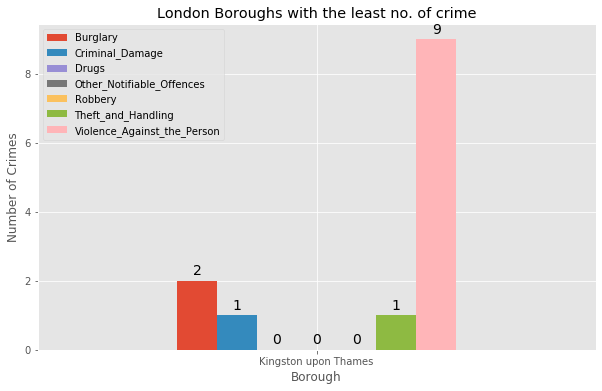

In [88]:
df_bc1 =  df_bot5[df_bot5['Borough'] == 'Kingston upon Thames']

df_bc = df_bc1[['Borough','Burglary','Criminal_Damage','Drugs','Other_Notifiable_Offences',
                 'Robbery','Theft_and_Handling','Violence_Against_the_Person']]


df_bc.set_index('Borough',inplace = True)

ax = df_bc.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [89]:

Neighborhood = ['Berrylands','Canbury','Chessington','Coombe','Hook','Kingston upon Thames',
'Kingston Vale','Malden Rushett','Motspur Park','New Malden','Norbiton',
'Old Malden','Seething Wells','Surbiton','Tolworth']

Borough = ['Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames']

Latitude = ['','','','','','','','','','','','','','','']
Longitude = ['','','','','','','','','','','','','','','']

df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,,
1,Canbury,Kingston upon Thames,,
2,Chessington,Kingston upon Thames,,
3,Coombe,Kingston upon Thames,,
4,Hook,Kingston upon Thames,,
5,Kingston upon Thames,Kingston upon Thames,,
6,Kingston Vale,Kingston upon Thames,,
7,Malden Rushett,Kingston upon Thames,,
8,Motspur Park,Kingston upon Thames,,
9,New Malden,Kingston upon Thames,,


In [90]:
Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},London,United Kingdom'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
    
df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,51.393781,-0.284802
1,Canbury,Kingston upon Thames,51.417499,-0.305553
2,Chessington,Kingston upon Thames,51.358336,-0.298622
3,Coombe,Kingston upon Thames,51.419450,-0.265398
4,Hook,Kingston upon Thames,51.367898,-0.307145
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898
9,New Malden,Kingston upon Thames,51.405335,-0.263407


In [91]:
address = 'Berrylands, London, United Kingdom'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berrylands, London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berrylands, London are 51.3937811, -0.2848024.


In [92]:
map_lon = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(kut_neig['Latitude'], kut_neig['Longitude'], kut_neig['Borough'], kut_neig['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon

In [93]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [94]:
kut_venues = getNearbyVenues(names=kut_neig['Neighborhood'],
                                   latitudes=kut_neig['Latitude'],
                                   longitudes=kut_neig['Longitude']
                                  )

Berrylands
Canbury
Chessington
Coombe
Hook
Kingston upon Thames
Kingston Vale
Malden Rushett
Motspur Park
New Malden
Norbiton
Old Malden
Seething Wells
Surbiton
Tolworth


In [95]:
print(kut_venues.shape)
kut_venues.head()

(168, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berrylands,51.393781,-0.284802,Surbiton Racket & Fitness Club,51.392676,-0.290224,Gym / Fitness Center
1,Berrylands,51.393781,-0.284802,Alexandra Park,51.394230,-0.281206,Park
2,Berrylands,51.393781,-0.284802,K2 Bus Stop,51.392302,-0.281534,Bus Stop
3,Berrylands,51.393781,-0.284802,CF And MC Stears,51.397809,-0.284082,Farmers Market
4,Canbury,51.417499,-0.305553,Canbury Gardens,51.417409,-0.305300,Park


In [96]:
kut_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berrylands,4,4,4,4,4,4
Canbury,14,14,14,14,14,14
Coombe,1,1,1,1,1,1
Hook,4,4,4,4,4,4
Kingston Vale,4,4,4,4,4,4
Kingston upon Thames,30,30,30,30,30,30
Malden Rushett,4,4,4,4,4,4
Motspur Park,4,4,4,4,4,4
New Malden,8,8,8,8,8,8


In [97]:
print('There are {} uniques categories.'.format(len(kut_venues['Venue Category'].unique())))


There are 69 uniques categories.


In [98]:

# one hot encoding
kut_onehot = pd.get_dummies(kut_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kut_onehot['Neighborhood'] = kut_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kut_onehot.columns[-1]] + list(kut_onehot.columns[:-1])
kut_onehot = kut_onehot[fixed_columns]

kut_onehot.head()

,Neighborhood,Asian Restaurant,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,Breakfast Spot,...,Seafood Restaurant,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station
0,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Canbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:

kut_grouped = kut_onehot.groupby('Neighborhood').mean().reset_index()
kut_grouped

,Neighborhood,Asian Restaurant,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,Breakfast Spot,...,Seafood Restaurant,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station
0,Berrylands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Canbury,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.071429,0.000000,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000
2,Coombe,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3,Hook,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kingston Vale,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Kingston upon Thames,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.033333,0.066667,0.000000,0.033333,0.033333,0.000000
6,Malden Rushett,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Motspur Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,New Malden,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000
9,Norbiton,0.000000,0.041667,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,...,0.041667,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000


In [100]:
num_top_venues = 5

for hood in kut_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = kut_grouped[kut_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berrylands----
                  venue  freq
0  Gym / Fitness Center  0.25
1                  Park  0.25
2        Farmers Market  0.25
3              Bus Stop  0.25
4                 Plaza  0.00


----Canbury----
                  venue  freq
0                   Pub  0.29
1  Gym / Fitness Center  0.07
2     Fish & Chips Shop  0.07
3                 Plaza  0.07
4                  Park  0.07


----Coombe----
                 venue  freq
0             Tea Room   1.0
1     Asian Restaurant   0.0
2  Japanese Restaurant   0.0
3             Pharmacy   0.0
4             Pet Café   0.0


----Hook----
               venue  freq
0  Fish & Chips Shop  0.25
1             Bakery  0.25
2  Indian Restaurant  0.25
3        Supermarket  0.25
4   Asian Restaurant  0.00


----Kingston Vale----
                 venue  freq
0         Soccer Field  0.25
1        Grocery Store  0.25
2                  Bar  0.25
3       Sandwich Place  0.25
4  Japanese Restaurant  0.00


----Kingston upon Thames----
      

In [101]:

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kut_grouped['Neighborhood']

for ind in np.arange(kut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kut_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Farmers Market,Park,Gym / Fitness Center,Bus Stop,Electronics Store,Deli / Bodega,Department Store,Discount Store,Dry Cleaner,Train Station
1,Canbury,Pub,Gym / Fitness Center,Park,Fish & Chips Shop,Supermarket,Spa,Shop & Service,Indian Restaurant,Café,Plaza
2,Coombe,Tea Room,Train Station,Farmers Market,Cosmetics Shop,Deli / Bodega,Department Store,Discount Store,Dry Cleaner,Electronics Store,Fast Food Restaurant
3,Hook,Bakery,Supermarket,Fish & Chips Shop,Indian Restaurant,Train Station,Farmers Market,Deli / Bodega,Department Store,Discount Store,Dry Cleaner
4,Kingston Vale,Grocery Store,Bar,Soccer Field,Sandwich Place,Train Station,Farmers Market,Deli / Bodega,Department Store,Discount Store,Dry Cleaner


In [102]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

kut_grouped_clustering = kut_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kut_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 1, 2, 3, 2, 3, 4, 2, 2], dtype=int32)

In [103]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kut_merged = kut_neig

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
kut_merged = kut_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

kut_merged.head() 

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,0.0,Farmers Market,Park,Gym / Fitness Center,Bus Stop,Electronics Store,Deli / Bodega,Department Store,Discount Store,Dry Cleaner,Train Station
1,Canbury,Kingston upon Thames,51.417499,-0.305553,2.0,Pub,Gym / Fitness Center,Park,Fish & Chips Shop,Supermarket,Spa,Shop & Service,Indian Restaurant,Café,Plaza
2,Chessington,Kingston upon Thames,51.358336,-0.298622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coombe,Kingston upon Thames,51.419450,-0.265398,1.0,Tea Room,Train Station,Farmers Market,Cosmetics Shop,Deli / Bodega,Department Store,Discount Store,Dry Cleaner,Electronics Store,Fast Food Restaurant
4,Hook,Kingston upon Thames,51.367898,-0.307145,2.0,Bakery,Supermarket,Fish & Chips Shop,Indian Restaurant,Train Station,Farmers Market,Deli / Bodega,Department Store,Discount Store,Dry Cleaner


In [104]:
kut_merged.dropna(inplace = True)

In [105]:
kut_merged.shape

(14, 15)

In [106]:
kut_merged['Cluster Labels'] = kut_merged['Cluster Labels'].astype(int)


In [107]:
kut_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 14
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            14 non-null     object 
 1   Borough                 14 non-null     object 
 2   Latitude                14 non-null     float64
 3   Longitude               14 non-null     float64
 4   Cluster Labels          14 non-null     int64  
 5   1st Most Common Venue   14 non-null     object 
 6   2nd Most Common Venue   14 non-null     object 
 7   3rd Most Common Venue   14 non-null     object 
 8   4th Most Common Venue   14 non-null     object 
 9   5th Most Common Venue   14 non-null     object 
 10  6th Most Common Venue   14 non-null     object 
 11  7th Most Common Venue   14 non-null     object 
 12  8th Most Common Venue   14 non-null     object 
 13  9th Most Common Venue   14 non-null     object 
 14  10th Most Common Venue  14 non-null     obje

In [108]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kut_merged['Latitude'], kut_merged['Longitude'], kut_merged['Neighborhood'], kut_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

In [109]:
kut_merged[kut_merged['Cluster Labels'] == 0]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,0,Farmers Market,Park,Gym / Fitness Center,Bus Stop,Electronics Store,Deli / Bodega,Department Store,Discount Store,Dry Cleaner,Train Station


In [110]:
kut_merged[kut_merged['Cluster Labels'] == 1]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Coombe,Kingston upon Thames,51.41945,-0.265398,1,Tea Room,Train Station,Farmers Market,Cosmetics Shop,Deli / Bodega,Department Store,Discount Store,Dry Cleaner,Electronics Store,Fast Food Restaurant


In [111]:
kut_merged[kut_merged['Cluster Labels'] == 2]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Canbury,Kingston upon Thames,51.417499,-0.305553,2,Pub,Gym / Fitness Center,Park,Fish & Chips Shop,Supermarket,Spa,Shop & Service,Indian Restaurant,Café,Plaza
4,Hook,Kingston upon Thames,51.367898,-0.307145,2,Bakery,Supermarket,Fish & Chips Shop,Indian Restaurant,Train Station,Farmers Market,Deli / Bodega,Department Store,Discount Store,Dry Cleaner
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,2,Coffee Shop,Café,Pub,Sushi Restaurant,Burger Joint,Department Store,Market,Mexican Restaurant,Clothing Store,French Restaurant
9,New Malden,Kingston upon Thames,51.405335,-0.263407,2,Gastropub,Korean Restaurant,Sushi Restaurant,Supermarket,Chinese Restaurant,Bar,Gym,Indian Restaurant,Electronics Store,Department Store
10,Norbiton,Kingston upon Thames,51.409999,-0.287396,2,Italian Restaurant,Indian Restaurant,Pub,Food,Fried Chicken Joint,Bagel Shop,Pharmacy,Pizza Place,Platform,Convenience Store
11,Old Malden,Kingston upon Thames,51.382484,-0.259090,2,Train Station,Pub,Food,Construction & Landscaping,Electronics Store,Cosmetics Shop,Deli / Bodega,Department Store,Discount Store,Dry Cleaner
12,Seething Wells,Kingston upon Thames,51.392642,-0.314366,2,Indian Restaurant,Coffee Shop,Pub,Café,Golf Course,Hotel,Pet Café,Italian Restaurant,Chinese Restaurant,Restaurant
13,Surbiton,Kingston upon Thames,51.393756,-0.303310,2,Coffee Shop,Pub,Pharmacy,Grocery Store,Italian Restaurant,Breakfast Spot,Gastropub,Farmers Market,Gym / Fitness Center,Hotel


In [112]:
kut_merged[kut_merged['Cluster Labels'] == 3]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138,3,Grocery Store,Bar,Soccer Field,Sandwich Place,Train Station,Farmers Market,Deli / Bodega,Department Store,Discount Store,Dry Cleaner
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,3,Garden Center,Grocery Store,Pub,Restaurant,Electronics Store,Cosmetics Shop,Deli / Bodega,Department Store,Discount Store,Dry Cleaner
14,Tolworth,Kingston upon Thames,51.378876,-0.282860,3,Grocery Store,Train Station,Restaurant,Discount Store,Hotel,Italian Restaurant,Coffee Shop,Pizza Place,Café,Bus Stop


In [113]:
kut_merged[kut_merged['Cluster Labels'] == 4]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,4,Restaurant,Park,Gym,Soccer Field,Train Station,Cosmetics Shop,Deli / Bodega,Department Store,Discount Store,Dry Cleaner


# _Results and Discussion_
The aim of this project is to help people who want to relocate to the safest borough in London, expats can chose the neighborhoods to which they want to relocate based on the most common venues in it. For example if a person is looking for a neighborhood with good connectivity and public transportation we can see that Clusters 3 and 4 have Train stations and Bus stops as the most common venues. If a person is looking for a neighborhood with stores and restaurants in a close proximity then the neighborhoods in the first cluster is suitable. For a family I feel that the neighborhoods in Cluster 4 are more suitable dues to the common venues in that cluster, these neighborhoods have common venues such as Parks, Gym/Fitness centers, Bus Stops, Restaurants, Electronics Stores and Soccer fields which is ideal for a family.

# _Conclusion_
This project helps a person get a better understanding of the neighborhoods with respect to the most common venues in that neighborhood. It is always helpful to make use of technology to stay one step ahead i.e. finding out more about places before moving into a neighborhood. We have just taken safety as a primary concern to shortlist the borough of London. The future of this project includes taking other factors such as cost of living in the areas into consideration to shortlist the borough based on safety and a predefined budget.